In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.linear_model import LinearRegression


In [9]:
df = pd.read_csv('automobiles.csv', sep = ';')

In [10]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


In [13]:
df['bore'] = df['bore'].astype('float64')
df['stroke'] = df['stroke'].astype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    int64  
 2   wheel-base         160 non-null    float64
 3   length             160 non-null    float64
 4   width              160 non-null    float64
 5   height             160 non-null    float64
 6   curb-weight        160 non-null    int64  
 7   engine-size        160 non-null    int64  
 8   bore               160 non-null    float64
 9   stroke             160 non-null    float64
 10  compression-ratio  160 non-null    float64
 11  horsepower         160 non-null    int64  
 12  peak-rpm           160 non-null    int64  
 13  city-mpg           160 non-null    int64  
 14  highway-mpg        160 non-null    int64  
 15  price              160 non-null    int64  
dtypes: float64(7), int64(9)
me

In [15]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.737500,121.300000,98.235625,172.319375,65.596250,53.878750,2459.450000,119.093750,3.298437,3.237313,10.145125,95.875000,5116.250000,26.506250,32.068750,11427.681250
std,1.189511,35.602417,5.163763,11.548860,1.946999,2.276608,480.897834,30.411186,0.267348,0.294210,3.882507,30.625708,465.290536,6.081208,6.440948,5863.789011
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.525000,64.000000,52.000000,2073.250000,97.000000,3.050000,3.107500,8.700000,69.000000,4800.000000,23.000000,28.000000,7383.500000
50%,1.000000,114.000000,96.900000,172.200000,65.400000,54.100000,2338.500000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9164.000000
75%,2.000000,148.000000,100.600000,177.800000,66.500000,55.500000,2808.750000,134.500000,3.550000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14559.250000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


Le DataFrame contient 13 colonnes, mais nous nous intéresserons uniquement à l’attribut ‘curb-weight’ et à la cariable ‘price’. 


La régression linéaire, dans sa forme générale, suppose que la relation entre la variable cible et la(les) variable(s) explicative(s) est linéaire. 


Il faut donc vérifier que cette hypothèse ait du sens. 


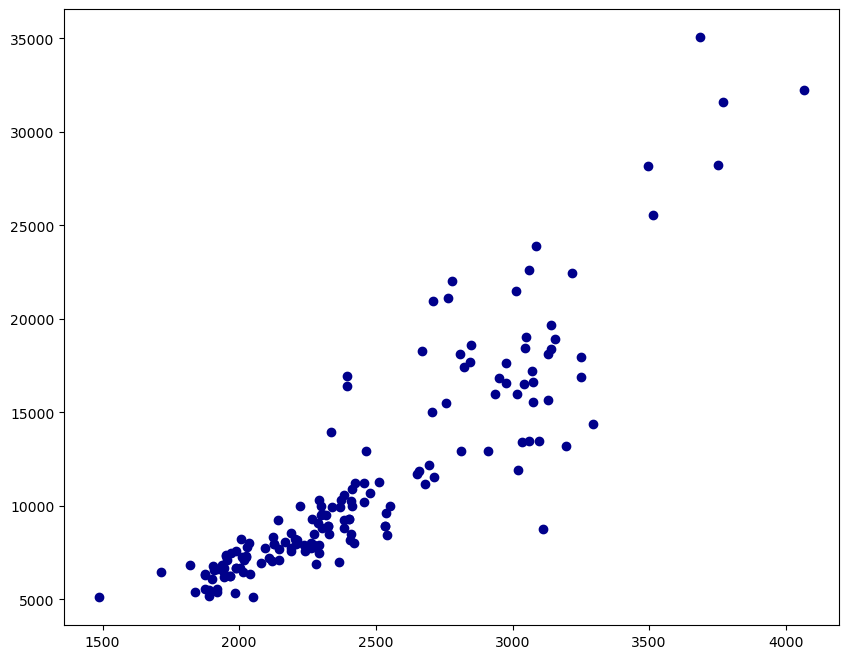

In [16]:
plt.figure(figsize=(10, 8))

plt.scatter(df['curb-weight'], df['price'], color='darkblue');

Les points semblent s’aligner le long d’une courbe proche d’une droite, en lien linéaire entre ces deux variables est donc plausible. 


Il est à présent possible de construire un modèle de régression linéaire grâce à la classe LinearRegression du sous module sklearn.linear_model. 


La construction du modèle est basée sur la méthode des moindres carrés ordinaire (MCO) qui consiste à minimiser la somme des carrés des écarts entre chaque point du nuage de régression et son projeté sur la droite de régression. 


In [17]:
prix = df['price']
mv = df[['curb-weight']]


In [18]:
slr = LinearRegression()
slr.fit(mv, prix)


LinearRegression()

Le modèle slr créé possède les attributs intercept_ et coef_ qui correspondant à l’ordonnée à l’origine et la pente de la droite dans le cas d’une régression linéaire simple. 

In [19]:
print(slr.intercept_)
print(slr.coef_)


-15376.86692829908
[10.89859447]


Ici le modèle peut se modélise de cette façon : prix = 15378.2+10.9*curb-weight.


En d’autres termes, si le poids à vide d’un véhicule augmente d’une unité de masse, son prix augmente de 10.9 euros. 


Attention cependant aux mauvaises interprétations : le coefficient de régression permet d’analyser la relation entre deux variables et non l’intensité ou la causalité de cette relation.


Par défaut sur scikit-learn, le score calculé pour l’évaluation des performances d’un régression est le coefficient de détermination (R2). Dans le cas d’une régression linéaire simple, ce coefficient équivaut au rapport entre la variance expliquée et la variance totale.


Le meilleur score possible vaut 1 et le score peut être négatif. Plus le score se rapproche de 1, plus le modèle est performant. 


In [20]:
cross_validate(slr, mv, prix, return_train_score=True, cv=4)


{'fit_time': array([0.00703144, 0.00209308, 0.000911  , 0.00200844]),
 'score_time': array([0.00120139, 0.        , 0.00225425, 0.        ]),
 'test_score': array([0.73752564, 0.81483629, 0.65408352, 0.80765298]),
 'train_score': array([0.80666168, 0.78145798, 0.81816955, 0.79388068])}

In [21]:
cross_validate(slr, mv, prix, return_train_score=True, cv=4)['test_score'].mean()

0.7535246063073479

Cette valeur signifie que la masse vide en ordre de marche d’une voiture explique environ 75% de la variance du prix. 


Le coefficient R2 se base sur les résidus : les différences entre la valeur ajustée de chaque point et sa valeur réelle.


Une fois les paramètres du modèle ajustés, on peut les utiliser afin de ‘prédire’ la variable cible pour la nouvelle valeur de(des) variable(s) explicative(s), grâce à la méthode predict appliquée au modèle. 


On peut également l’utiliser pour calculer les valeurs ajustées par le modèle. 


In [22]:
pred_prix = slr.predict(mv)
residus = pred_prix - prix
residus.describe()


count    1.600000e+02
mean     1.273293e-12
std      2.629597e+03
min     -1.027155e+04
25%     -1.108884e+03
50%      1.447688e+02
75%      1.447202e+03
max      9.739762e+03
Name: price, dtype: float64

Pour avoir une idée de comment le modèle linéaire s’adapte aux données, le plus efficace reste de tracer la droite de régression sur le nuage de points affiché plus haut. 

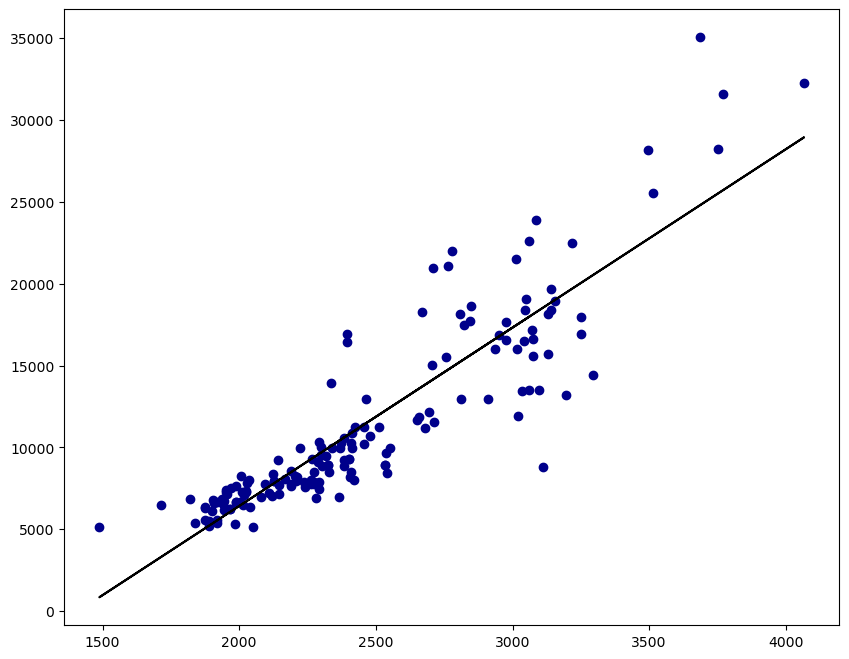

In [23]:
plt.figure(figsize=(10, 8))

plt.scatter(mv['curb-weight'], prix, color='darkblue')
plt.plot(mv, pred_prix ,color='k');


La droite de régression semble raisonnablement ajustée, quelques points sont plus éloignés de la droite, notamment ceux avec un prix élevé mais l’ensemble reste relativement correct. 


Les valeurs aberrantes peuvent avoir une grande influence sur les modèles de régression linéaire : puisque le propre de la régression est la minimisation des résidus au carré, les résidus importants ont une influence disproportionnée sur le modèle. 


L’affichage de la droite nous aide à détecter les valeurs aberrantes influentes. Dans notre graphique, il ne semble pas y avoir de valeurs aberrantes influentes. 


In [24]:
from sklearn.feature_selection import f_regression

print('F-statistique :', f_regression(mv, prix)[0], 'p-value :', f_regression(mv, prix)[1])
## p-value ~ 0 donc la variable mv très significative.


F-statistique : [627.66106768] p-value : [6.61188355e-57]


Une autre métrique souvent utilisée pour évaluer un modèle de régression est la racine de l'erreur quadratique (RMSE en anglais).

Contrairement au R², qui ne s'applique qu'aux modèles de régression linéaire, le RMSE est une métrique d'évaluation universelle qui nous permet de comparer les performances de prédiction de différents types de modèles.


Le RMSE est la racine carrée de la moyenne des résidus au carré.


In [25]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

rmse(pred_prix, prix)


2621.367031971261

De toute évidence, plus l'erreur quadratique moyenne est proche de 0, plus précises sont les prédictions.
En revanche, le RMSE ne s'interprète pas si facilement lorsqu'il est calculé sur un seul modèle, et sert souvent plus de comparateur entre plusieurs modèles.


Il est en effet complètement dépendant de l'échelle de la variable cible, ou variable à expliquer. Il n'y a donc pas de seuil permettant de juger de la bonne performance d'un modèle.


En outre, ici il est élevé puisqu'il est calculé sur une variable cible contenant des prix de voitures de moyenne de 11445. D'autre part, les données sont NON normalisées.



La fonction cross_val_predict de sklearn.model_selection permet d'effectuer des prédictions sur un ensemble de données par validation croisée, et retourne pour chacun des éléments du jeu de données, la prédiction obtenue pour cet élément lorsqu'il était dans l'échantillon de test.


En pratique, les données sont divisées en un nombre k d'échantillons, puis k régressions sont réalisées en mettant de côté à chaque étape un échantillon différent parmi les k.


Les prédictions sont ensuite calculées pour chaque élément de cet échantillon mis de côté, à partir des coefficients calculés sur les autres.

In [26]:
pred_prix2 = cross_val_predict(slr, mv, prix, cv=4) 

rmse(pred_prix2, prix)


2770.2683630550887

Le RMSE obtenu est plus élevé que celui obtenu plus haut.
Ceci est logique puisqu'il était calculé sur les données qui ont elles-mêmes servi à construire le modèle, qui calcule les coefficients de manière à minimiser la somme des erreurs quadratiques.


Cependant, plus le modèle est performant, mieux il se généralise, et plus proches doivent être les RMSE calculées sur l'échantillon d'entraînement et sur des données nouvelles.


L'objectif étant de se familiariser à la régression linéaire à l'aide d'une régression linéaire simple, le modèle n'est pas des plus performants, et certaines hypothèses importantes à l'élaboration d'une régression linéaire n'ont pas été prises en compte.